In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\Snow\Downloads\Yeni klasör\profile_login_20181217_20190113.csv', encoding='utf-8-sig', engine='python')
df.sample(5)

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version
515212,2019-01-05 14:01:58,280636223252,hunt_live01,74,60980,0,417333,161698,8292,2018-03-17 17:41:21,1.4.0.515
354297,2019-01-03 22:41:50,780329246808,hunt_live01,14,6310,0,38244,18730,6485,2018-12-29 14:55:58,1.4.0.515
697553,2019-01-08 23:12:04,881090470662,hunt_live01,74,62275,0,140328,93253,9998,2018-08-05 04:27:51,1.4.0.515
408476,2019-01-13 08:07:41,180435274267,hunt_live01,1,125,0,4335,1062,3919,2019-01-12 17:24:59,1.4.0.518
368166,2018-12-27 06:10:53,880357039809,hunt_live01,100,101659,0,1579006,1108547,106722,2018-02-23 05:29:18,1.4.0.515


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185910 entries, 0 to 1185909
Data columns (total 11 columns):
log_datetime           1185910 non-null object
user_id                1185910 non-null int64
host_id                1185910 non-null object
rank_id                1185910 non-null int64
rank_points            1185910 non-null int64
prestige               1185910 non-null int64
total_online_time      1185910 non-null int64
total_playtime         1185910 non-null int64
game_money             1185910 non-null int64
profile_create_time    1185910 non-null object
client_version         1185910 non-null object
dtypes: int64(7), object(4)
memory usage: 99.5+ MB


In [4]:
df.describe()

,user_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money
count,"1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00","1,185,910.00"
mean,"579,654,025,680.96",51.67,"43,847.09",1.20,"204,817.01","131,731.36","11,970.34"
std,"257,338,636,628.45",35.59,"37,841.27",3.36,"372,589.47","261,068.22","23,576.71"
min,"179,602,754,859.00",1.00,0.00,0.00,0.00,0.00,0.00
25%,"380,186,055,198.00",16.00,"7,605.00",0.00,"30,034.00","17,317.00","4,512.00"
50%,"580,681,552,879.00",50.00,"33,746.00",0.00,"99,951.00","61,148.00","7,474.00"
75%,"781,654,982,447.00",87.00,"80,540.00",1.00,"226,542.00","141,066.00","13,025.00"
max,"988,867,734,681.00",100.00,"107,795.00",50.00,"5,935,091.00","4,678,431.00","1,043,963.00"


In [5]:
df_categorical=df.select_dtypes(include=['object']).copy()
print(df_categorical.describe())

               log_datetime      host_id  profile_create_time client_version
count               1185910      1185910              1185910        1185910
unique               915615            2               141948              5
top     2018-12-30 16:02:14  hunt_live01  2018-02-23 01:24:02      1.4.0.515
freq                     20      1185688                  614         901230


In [6]:
c = df.host_id.value_counts(dropna=False)
p = df.host_id.value_counts(dropna=False, normalize=True)*100
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
hunt_live01,1185688,99.98
hunt_stage01,222,0.02


In [7]:
#drop test server data
df_live=df[df.host_id != 'hunt_stage01']

In [8]:
c = df_live.client_version.value_counts(dropna=False)
p = df_live.client_version.value_counts(dropna=False, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
1.4.0.515,901162,0.76
1.4.0.518,170414,0.14
1.4.0.508,114112,0.10


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
#convert to object to datetime
df_live["profile_create_time"]=pd.to_datetime(df_live["profile_create_time"])
df_live["log_datetime"]=pd.to_datetime(df_live["log_datetime"])

In [11]:
#convert to datetime to date
df_live["log_date"]=df_live["log_datetime"].dt.date
df_live['profile_create_date'] = df_live['profile_create_time'].dt.strftime('%Y-%m-%d')
df_live.head()

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version,log_date,profile_create_date
0,2019-01-07 19:12:40,579602659126,hunt_live01,96,94265,0,348156,226938,11641,2018-03-13 21:03:45,1.4.0.515,2019-01-07,2018-03-13
1,2019-01-08 14:10:29,579602659126,hunt_live01,96,94265,0,348542,226938,11433,2018-03-13 21:03:45,1.4.0.515,2019-01-08,2018-03-13
2,2019-01-10 16:39:09,579602659126,hunt_live01,96,94265,0,348562,226938,11433,2018-03-13 21:03:45,1.4.0.518,2019-01-10,2018-03-13
3,2019-01-12 19:57:17,579602659126,hunt_live01,97,96345,0,361358,234158,9845,2018-03-13 21:03:45,1.4.0.518,2019-01-12,2018-03-13
4,2019-01-13 05:06:26,979602665731,hunt_live01,22,10570,1,61389,19020,9581,2018-02-23 06:52:42,1.4.0.518,2019-01-13,2018-02-23


In [21]:
#select data has create date between Dec 17 and Jan 13
df_live=df_live[df_live['profile_create_time']>='2018-12-17 00:00:00']
df_live.head(5)

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version,log_date,profile_create_date,LoginPeriod
154,2018-12-17 02:13:50,879602766403,hunt_live01,1,0,0,0,0,4000,2018-12-17 02:13:50,1.4.0.508,2018-12-17,2018-12-17,2018-12-17/2018-12-23
155,2018-12-18 06:06:06,879602766403,hunt_live01,2,260,0,1419,787,4075,2018-12-17 02:13:50,1.4.0.508,2018-12-18,2018-12-17,2018-12-17/2018-12-23
175,2018-12-25 17:33:28,579602799714,hunt_live01,1,0,0,0,0,4000,2018-12-25 17:33:28,1.4.0.515,2018-12-25,2018-12-25,2018-12-24/2018-12-30
327,2019-01-06 16:12:23,879602869732,hunt_live01,2,675,0,2716,1655,4075,2019-01-06 15:04:18,1.4.0.515,2019-01-06,2019-01-06,2018-12-31/2019-01-06
328,2019-01-06 17:11:24,879602869732,hunt_live01,3,810,0,3839,2418,4325,2019-01-06 15:04:18,1.4.0.515,2019-01-06,2019-01-06,2018-12-31/2019-01-06


In [22]:
#create weekly cohort period
df_live['LoginPeriod'] = df_live["log_datetime"].dt.to_period('W') 
df_live.head()

,log_datetime,user_id,host_id,rank_id,rank_points,prestige,total_online_time,total_playtime,game_money,profile_create_time,client_version,log_date,profile_create_date,LoginPeriod
154,2018-12-17 02:13:50,879602766403,hunt_live01,1,0,0,0,0,4000,2018-12-17 02:13:50,1.4.0.508,2018-12-17,2018-12-17,2018-12-17/2018-12-23
155,2018-12-18 06:06:06,879602766403,hunt_live01,2,260,0,1419,787,4075,2018-12-17 02:13:50,1.4.0.508,2018-12-18,2018-12-17,2018-12-17/2018-12-23
175,2018-12-25 17:33:28,579602799714,hunt_live01,1,0,0,0,0,4000,2018-12-25 17:33:28,1.4.0.515,2018-12-25,2018-12-25,2018-12-24/2018-12-30
327,2019-01-06 16:12:23,879602869732,hunt_live01,2,675,0,2716,1655,4075,2019-01-06 15:04:18,1.4.0.515,2019-01-06,2019-01-06,2018-12-31/2019-01-06
328,2019-01-06 17:11:24,879602869732,hunt_live01,3,810,0,3839,2418,4325,2019-01-06 15:04:18,1.4.0.515,2019-01-06,2019-01-06,2018-12-31/2019-01-06


In [23]:
grouped = df_live.groupby(['profile_create_date','LoginPeriod'])
# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'user_id': pd.Series.nunique})
# make the column names more meaningful
cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
cohorts.head(5)

TotalUsers
profile_create_date LoginPeriod                      
2018-12-17          2018-12-17/2018-12-23        2602
                    2018-12-24/2018-12-30         696
                    2018-12-31/2019-01-06         455
                    2019-01-07/2019-01-13         345
2018-12-18          2018-12-17/2018-12-23        2565

In [24]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
profile_create_date LoginPeriod                                    
2018-12-17          2018-12-17/2018-12-23        2602             1
                    2018-12-24/2018-12-30         696             2
                    2018-12-31/2019-01-06         455             3
                    2019-01-07/2019-01-13         345             4
2018-12-18          2018-12-17/2018-12-23        2565             1

In [25]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['profile_create_date', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

profile_create_date
2018-12-17    2602
2018-12-18    2565
2018-12-19    1968
2018-12-20    1255
2018-12-21    1832
Name: TotalUsers, dtype: int64

In [26]:
cohorts['TotalUsers'].head()

profile_create_date  CohortPeriod
2018-12-17           1               2602
                     2                696
                     3                455
                     4                345
2018-12-18           1               2565
Name: TotalUsers, dtype: int64

In [27]:
cohorts['TotalUsers'].unstack(0).head()

profile_create_date,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,...,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,"2,602.00","2,565.00","1,968.00","1,255.00","1,832.00","2,023.00","1,890.00","1,591.00","2,017.00","2,169.00",...,"1,000.00",805.00,750.00,543.00,477.00,482.00,465.00,485.00,622.00,620.00
2,696.00,780.00,662.00,479.00,805.00,964.00,"1,155.00",520.00,660.00,751.00,...,439.00,376.00,418.00,nan,nan,nan,nan,nan,nan,nan
3,455.00,469.00,434.00,271.00,440.00,536.00,570.00,325.00,428.00,450.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,345.00,398.00,331.00,183.00,352.00,372.00,373.00,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [28]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

profile_create_date,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,...,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.27,0.30,0.34,0.38,0.44,0.48,0.61,0.33,0.33,0.35,...,0.44,0.47,0.56,nan,nan,nan,nan,nan,nan,nan
3,0.17,0.18,0.22,0.22,0.24,0.26,0.30,0.20,0.21,0.21,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.13,0.16,0.17,0.15,0.19,0.18,0.20,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


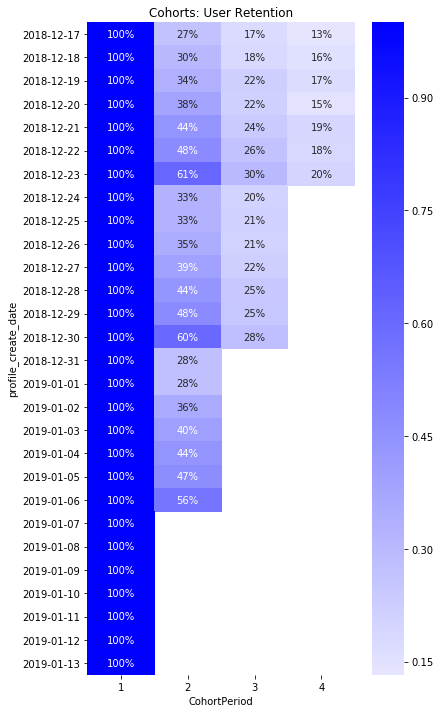

In [42]:
import seaborn as sns
colormap=sns.light_palette("blue",as_cmap=True, reverse=False)

plt.figure(figsize=(6,12))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap=colormap);